In [2]:
import pandas as pd
import seaborn as sns
data = pd.read_csv("cardio_train.csv", delimiter = ";")

In [3]:
data.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


<Axes: xlabel='cardio', ylabel='weight'>

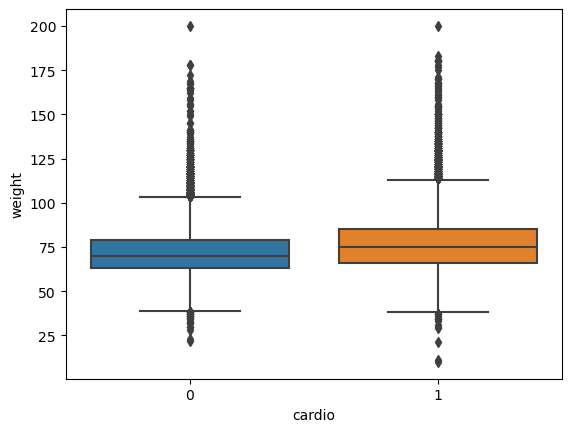

In [9]:
sns.boxplot(data = data, x = "cardio", y = "weight")

In [ ]:
pd.read_excel